In [12]:
import cirq
import numpy as np
import cirq_superstaq as css

In [13]:
try:
    import qiskit

    install_qiskit = not ("0.18" <= qiskit.__version__ < "0.19")
except ImportError:
    install_qiskit = True

if install_qiskit:
    print("installing qiskit...")
    !pip install -q qiskit-terra==0.18.3
    print("installed qiskit.")

In [14]:
service = css.Service(api_key="YOUR API KEY")

In [15]:
qubits = cirq.LineQubit.range(2)

In [16]:
circuit = cirq.Circuit(css.AceCRPlusMinus(qubits[0], qubits[1]))

In [17]:
circuit

0: ───AceCR+-(Z side)───
      │
1: ───AceCR+-(X side)───

In [18]:
out = service.ibmq_compile(circuit, target="ibmq_jakarta_qpu")

In [19]:
out.circuit

0: ───AceCR+-(Z side)───
      │
1: ───AceCR+-(X side)───

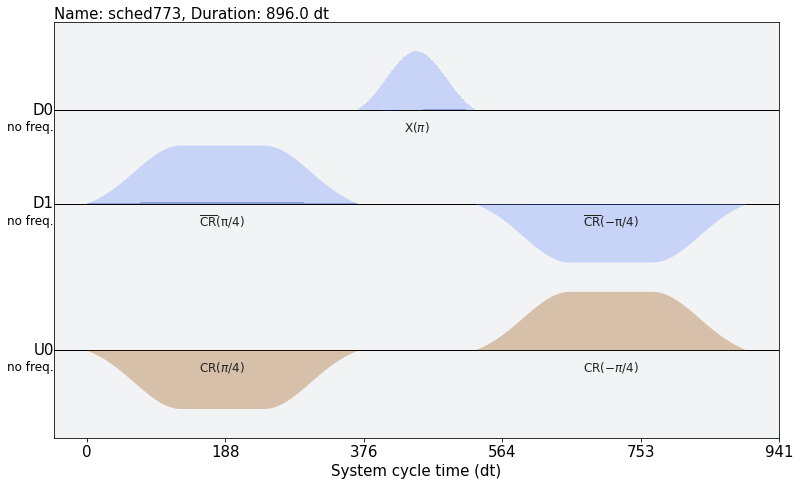

In [20]:
out.pulse_sequence.draw()

In [21]:
circuit = cirq.Circuit(css.AceCR("-+", np.pi / 2)(qubits[0], qubits[1]))
out = service.ibmq_compile(circuit, target="ibmq_jakarta_qpu")

In [22]:
out.circuit

0: ───AceCR-+(Z side)─────────────
      │
1: ───AceCR-+(X side)|Rx(0.5π)|───

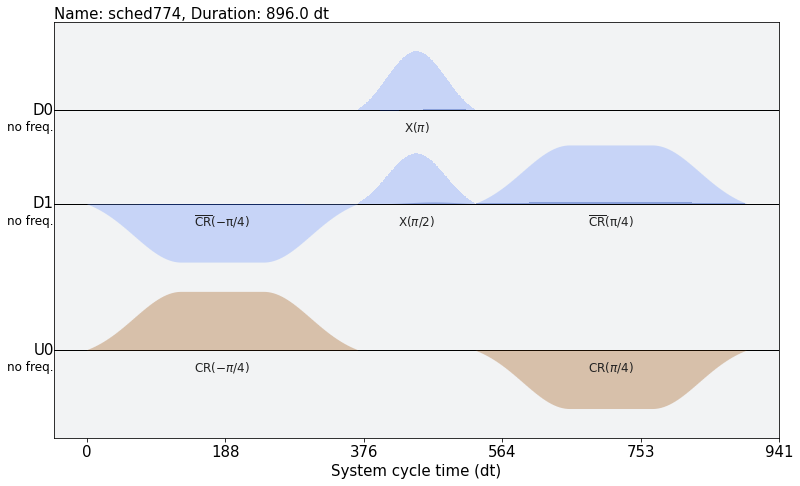

In [23]:
out.pulse_sequence.draw()